In [1]:
import aug_util as aug
import wv_util as wv
import matplotlib.pyplot as plt
import numpy as np
import csv
%matplotlib inline

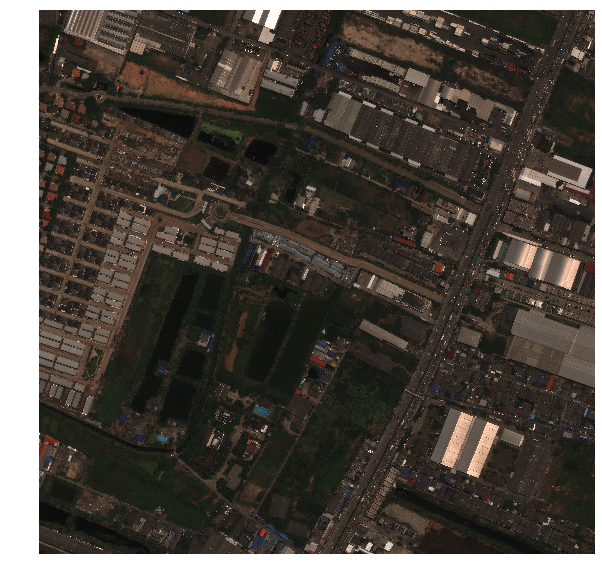

In [4]:
#Load an image
chip_name = '819.tif'
chip_path = '../../../xview_data_small/train_images/{}'.format(chip_name)
arr = wv.get_image(chip_path)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(arr)

In [6]:
#Loading our labels
coords, chips, classes = wv.get_labels('../../../xview_data_small/xView_train.geojson')
print(len(coords))
print(len(classes))

#We only want to coordinates and classes that are within our chip
coords = coords[chips==chip_name]
classes = classes[chips==chip_name].astype(np.int64)

print(len(coords))
print(len(classes))

print(coords)
print(classes)

100%|██████████| 601937/601937 [00:02<00:00, 214091.95it/s]


601937
601937
1941
1941
[[3239. 3186. 3277. 3219.]
 [3242. 2278. 3279. 2322.]
 [3239. 2349. 3274. 2416.]
 ...
 [ 533.  816.  550.  827.]
 [ 690.  855.  723.  887.]
 [ 616.  729.  642.  747.]]
[73 73 73 ... 23 32 64]


In [5]:
unique_classes = set(classes)
print(unique_classes)

{73, 18, 19, 21, 86, 23, 24, 62, 63}


In [7]:
#Load the class number -> class string label map
labels = {}
with open('xview_class_labels.txt') as f:
    for row in csv.reader(f):
        labels[int(row[0].split(":")[0])] = row[0].split(":")[1]

In [8]:
#We can find which classes are present in this image
print([labels[i] for i in np.unique(classes)])

['Passenger Vehicle', 'Small Car', 'Bus', 'Pickup Truck', 'Utility Truck', 'Truck', 'Trailer', 'Crane Truck', 'Engineering Vehicle', 'Mobile Crane', 'Excavator', 'Building', 'Damaged Building', 'Vehicle Lot', 'Shipping container lot', 'Shipping Container']


In [9]:
#We can chip the image into 500x500 chips
c_img, c_box, c_cls = wv.chip_image(img = arr, coords= coords, classes=classes, shape=(500,500))
print("Num Chips: %d" % c_img.shape[0])

print(c_img.shape)
print(len(c_box))
print(len(c_cls))
print(c_box[11])
print(c_cls[11])

Num Chips: 36
(36, 500, 500, 3)
36
36
[[112.   0. 149.   6.]
 [ 60.   5. 126.  59.]
 [142.   2. 204.  62.]
 [199.  13. 265.  60.]
 [245.   6. 256.  21.]
 [256.   9. 265.  24.]
 [271.  13. 279.  27.]
 [278.  13. 287.  29.]
 [313.  20. 325.  35.]
 [166.   0. 197.   2.]
 [271. 125. 289. 137.]
 [392. 112. 500. 218.]
 [459.   0. 500. 113.]
 [143. 493. 203. 500.]]
[73 73 73 73 18 18 18 18 23 73 18 73 73 73]


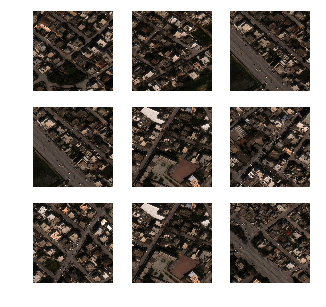

In [9]:
#We can plot some of the chips
fig,ax = plt.subplots(3)
fig.set_figheight(5)
fig.set_figwidth(5)

for k in range(9):
    plt.subplot(3,3,k+1)
    plt.axis('off')
    plt.imshow(c_img[np.random.choice(range(c_img.shape[0]))])

plt.show()

25
8.0 94.0 75.0 169.0


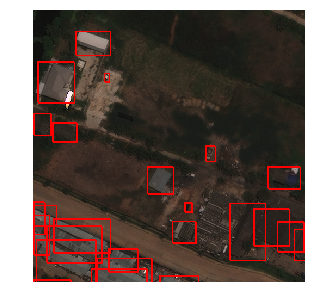

In [10]:
#We can visualize the chips with their labels
ind = np.random.choice(range(c_img.shape[0]))
ind = 20
print(len(c_cls[ind]))
xmin, ymin, xmax, ymax = c_box[ind][0]
print(xmin, ymin, xmax, ymax)
labelled = aug.draw_bboxes(c_img[ind],c_box[ind])
plt.figure(figsize=(5,5))
plt.axis('off')
plt.imshow(labelled)

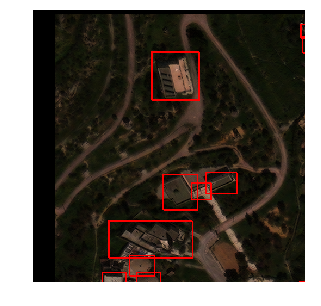

In [16]:
#We can shift the chips
i1,b1 = aug.shift_image(c_img[ind],c_box[ind])
a1 = aug.draw_bboxes(i1,b1)
plt.figure(figsize=(5,5))
plt.axis('off')
plt.imshow(a1)

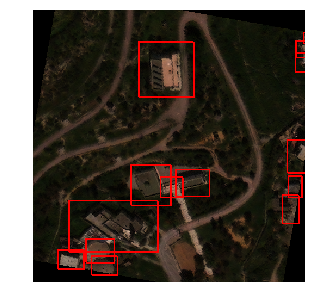

In [18]:
#We can rotate the chips
center = (int(c_img[ind].shape[0]/2),int(c_img[ind].shape[1]/2))
i2,b2 = aug.rotate_image_and_boxes(c_img[ind],10, center, c_box[ind])
a2 = aug.draw_bboxes(i2,b2)
plt.figure(figsize=(5,5))
plt.axis('off')
plt.imshow(a2)

In [11]:
#There are other augmentations available in 'aug_util.py'
#From here, you can save out the chipped images to a TFRecord or other medium
#Use 'process_wv.py' to create a TFRecord file from xView imagery